<a href="https://colab.research.google.com/github/brex19/PRODIGY_ML_01/blob/main/linear_regrsession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**problem of statement**

**Implement  a linear regression that used to predict the price of house based on square footage,number of bathroom and number of bedrooom**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk
from  sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# load the training data

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/prodigy/houseprice_prediction_Dataset/train.csv")


In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# select target and criteria

In [5]:
train=data.drop(columns=data.columns.difference(['LotArea','SalePrice','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr']))
print(train)

      LotArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        8450             1             0         2         1             3   
1        9600             0             1         2         0             3   
2       11250             1             0         2         1             3   
3        9550             1             0         1         0             3   
4       14260             1             0         2         1             4   
...       ...           ...           ...       ...       ...           ...   
1455     7917             0             0         2         1             3   
1456    13175             1             0         2         0             3   
1457     9042             0             0         2         0             4   
1458     9717             1             0         1         0             2   
1459     9937             1             0         1         1             3   

      SalePrice  
0        208500  
1        181500

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   BsmtFullBath  1460 non-null   int64
 2   BsmtHalfBath  1460 non-null   int64
 3   FullBath      1460 non-null   int64
 4   HalfBath      1460 non-null   int64
 5   BedroomAbvGr  1460 non-null   int64
 6   SalePrice     1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


In [7]:
# Columns name of the dataset
train.columns.tolist()

['LotArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'SalePrice']

In [8]:
# checking for missing values
train.isnull().sum()

LotArea         0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64

Discriptive statistics

In [9]:
stat=train.describe().transpose()
print(stat)

               count           mean           std      min       25%  \
LotArea       1460.0   10516.828082   9981.264932   1300.0    7553.5   
BsmtFullBath  1460.0       0.425342      0.518911      0.0       0.0   
BsmtHalfBath  1460.0       0.057534      0.238753      0.0       0.0   
FullBath      1460.0       1.565068      0.550916      0.0       1.0   
HalfBath      1460.0       0.382877      0.502885      0.0       0.0   
BedroomAbvGr  1460.0       2.866438      0.815778      0.0       2.0   
SalePrice     1460.0  180921.195890  79442.502883  34900.0  129975.0   

                   50%       75%       max  
LotArea         9478.5   11601.5  215245.0  
BsmtFullBath       0.0       1.0       3.0  
BsmtHalfBath       0.0       0.0       2.0  
FullBath           2.0       2.0       3.0  
HalfBath           0.0       1.0       2.0  
BedroomAbvGr       3.0       3.0       8.0  
SalePrice     163000.0  214000.0  755000.0  


# Feature Data Analysis

## **SalePrice**

In [10]:
print(train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


## Plot SalePrice

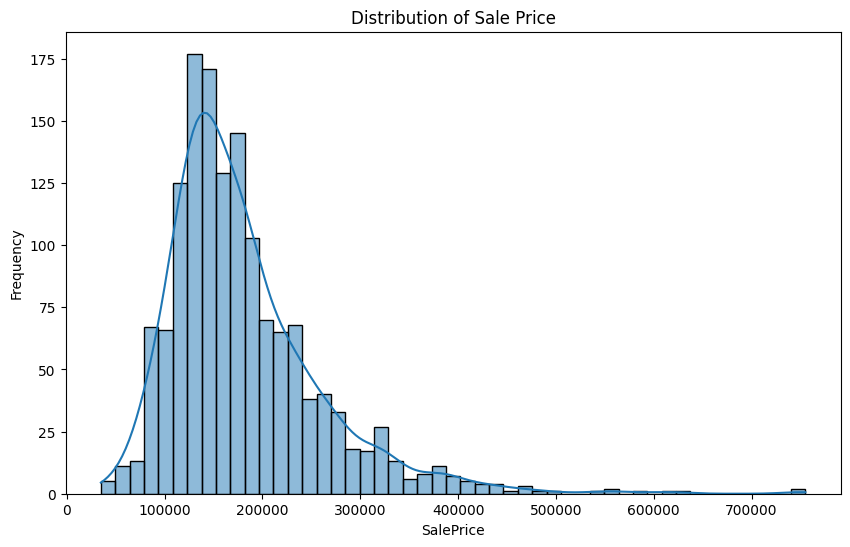

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'], kde=True)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')
plt.show()


## LotArea

In [12]:
print(train['LotArea'].describe())

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


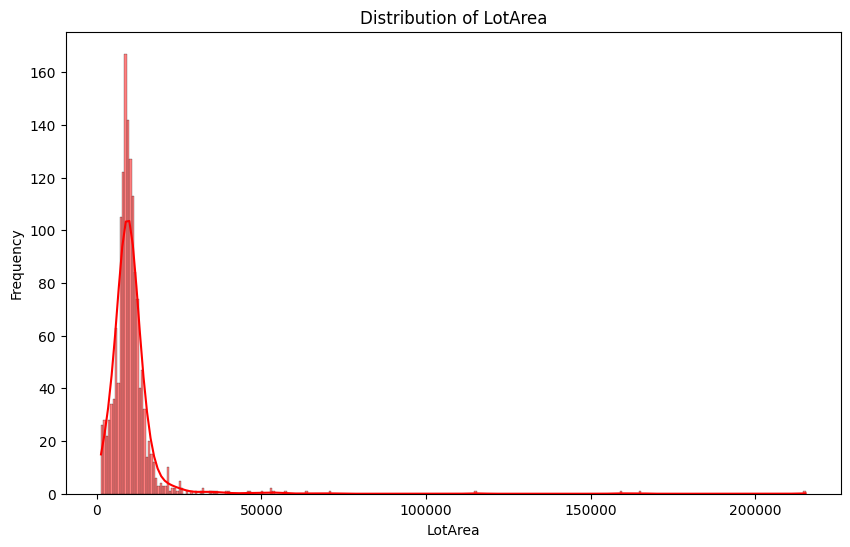

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(train['LotArea'], kde=True,color='Red')
plt.xlabel('LotArea')
plt.ylabel('Frequency')
plt.title('Distribution of LotArea')
plt.show()

# BsmtFullBath

In [14]:
print(train['BsmtFullBath'].describe())

count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


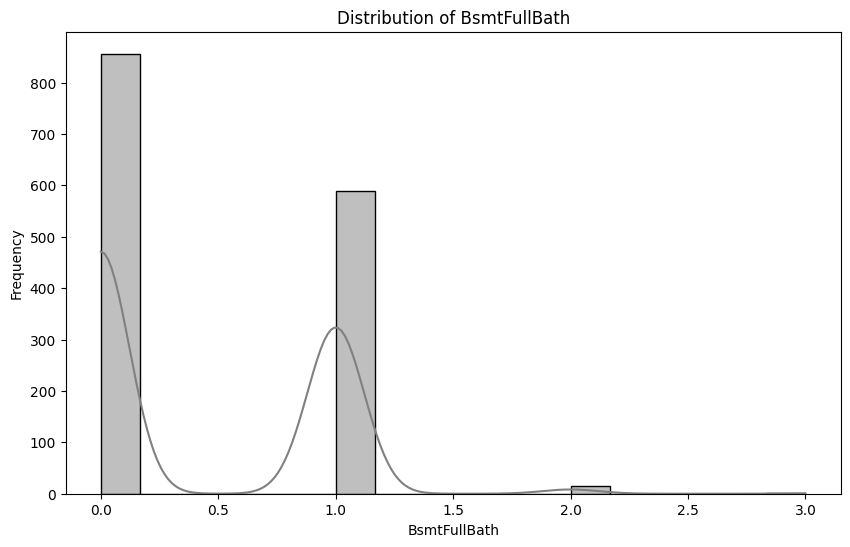

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(train['BsmtFullBath'], kde=True,color='Gray')
plt.xlabel('BsmtFullBath')
plt.ylabel('Frequency')
plt.title('Distribution of BsmtFullBath')
plt.show()

## BsmtHalfBath

In [16]:
print(train['BsmtHalfBath'].describe())

count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


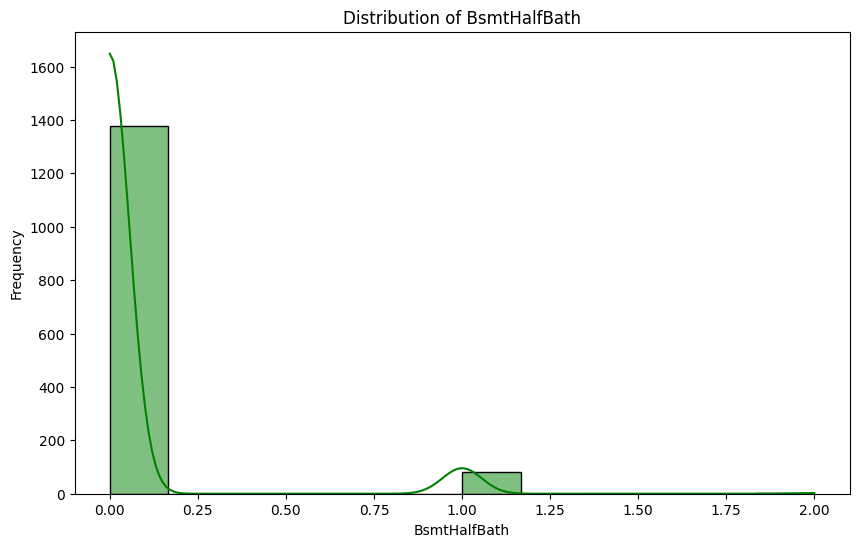

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(train['BsmtHalfBath'], kde=True,color='Green')
plt.xlabel('BsmtHalfBath')
plt.ylabel('Frequency')
plt.title('Distribution of BsmtHalfBath')
plt.show()

## FullBath

In [18]:
print(train['FullBath'].describe())

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


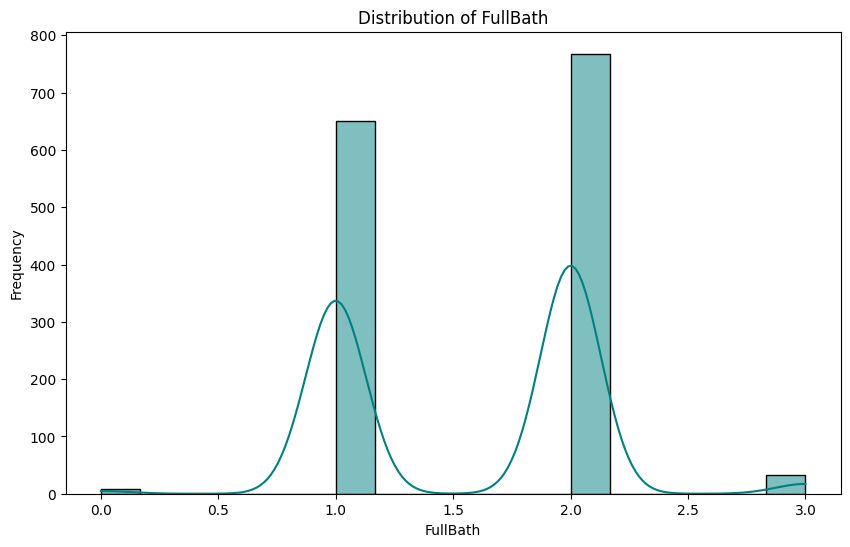

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(train['FullBath'], kde=True,color='Teal')
plt.xlabel('FullBath')
plt.ylabel('Frequency')
plt.title('Distribution of FullBath')
plt.show()

## HalfBath      

In [20]:
print(train['HalfBath'].describe())

count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


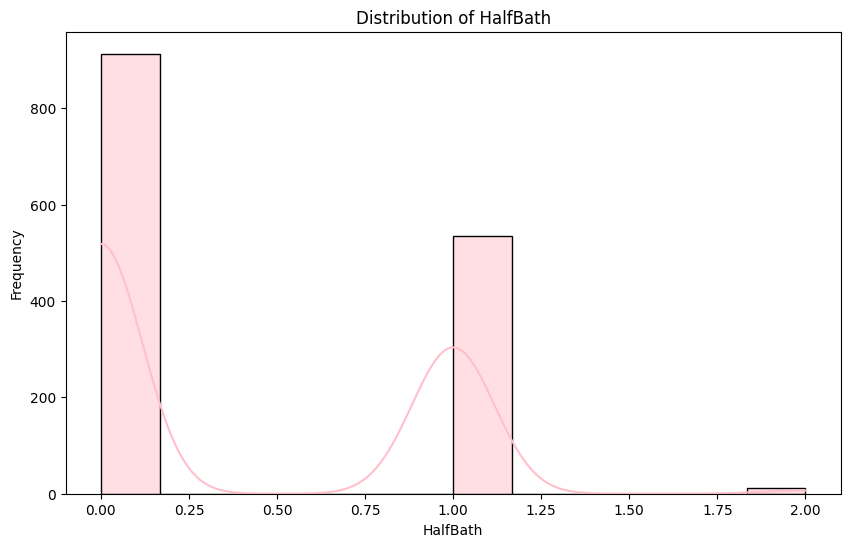

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(train['HalfBath'], kde=True,color='pink')
plt.xlabel('HalfBath')
plt.ylabel('Frequency')
plt.title('Distribution of HalfBath')
plt.show()

## BedroomAbvGr

In [22]:
print(train['BedroomAbvGr'].describe())

count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


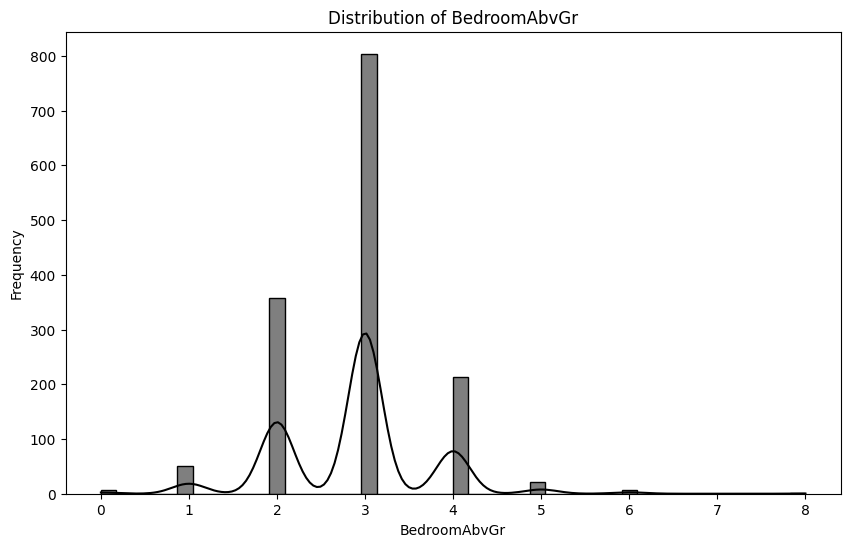

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(train['BedroomAbvGr'], kde=True,color='black')  # Corrected variable name
plt.xlabel('BedroomAbvGr')
plt.ylabel('Frequency')
plt.title('Distribution of BedroomAbvGr')
plt.show()

# Correlation Analysis

## Correlation Analysis for SalePrice

In [24]:
# correlation analysis  for SalePrice with 0.1threshold
train_corr_SalePrice = train.corr()['SalePrice'][:-1]
key_features_list_rate = train_corr_SalePrice[abs(train_corr_SalePrice) > 0.1].sort_values(ascending=False)
print(f"There are strongly correlated values with Erate:\n{key_features_list_rate}")

There are strongly correlated values with Erate:
FullBath        0.560664
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BedroomAbvGr    0.168213
Name: SalePrice, dtype: float64


In [25]:
# correlation analysis  for SalePrice with 0.3threshold
train_corr_SalePrice = train.corr()['SalePrice'][:-1]
key_features_list_rate = train_corr_SalePrice[abs(train_corr_SalePrice) > 0.3].sort_values(ascending=False)
print(f"There are strongly correlated values with Erate:\n{key_features_list_rate}")

There are strongly correlated values with Erate:
FullBath    0.560664
Name: SalePrice, dtype: float64


In [26]:
# correlation analysis  for SalePrice with 0.5threshold
train_corr_SalePrice = train.corr()['SalePrice'][:-1]
key_features_list_rate = train_corr_SalePrice[abs(train_corr_SalePrice) > 0.5].sort_values(ascending=False)
print(f"There are strongly correlated values with Erate:\n{key_features_list_rate}")

There are strongly correlated values with Erate:
FullBath    0.560664
Name: SalePrice, dtype: float64


# Plot Correlation analysis for SalePrice

## using heatmap

<Axes: >

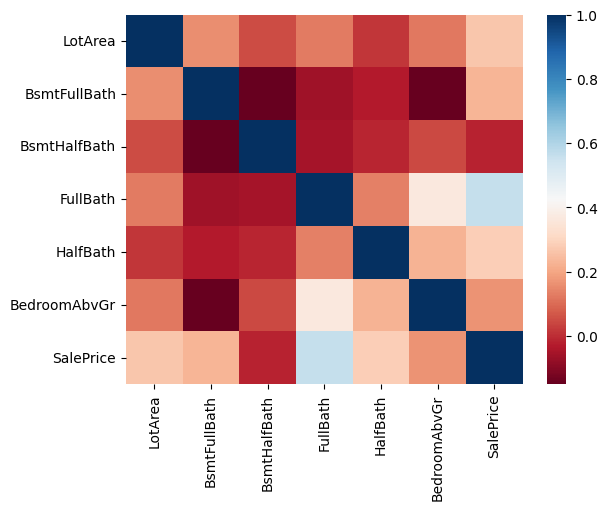

In [27]:
# Calculating the correlation matrix
SalePrice_corr = train.corr()
sns.heatmap(SalePrice_corr,cmap='RdBu')

## Using Scatterplot

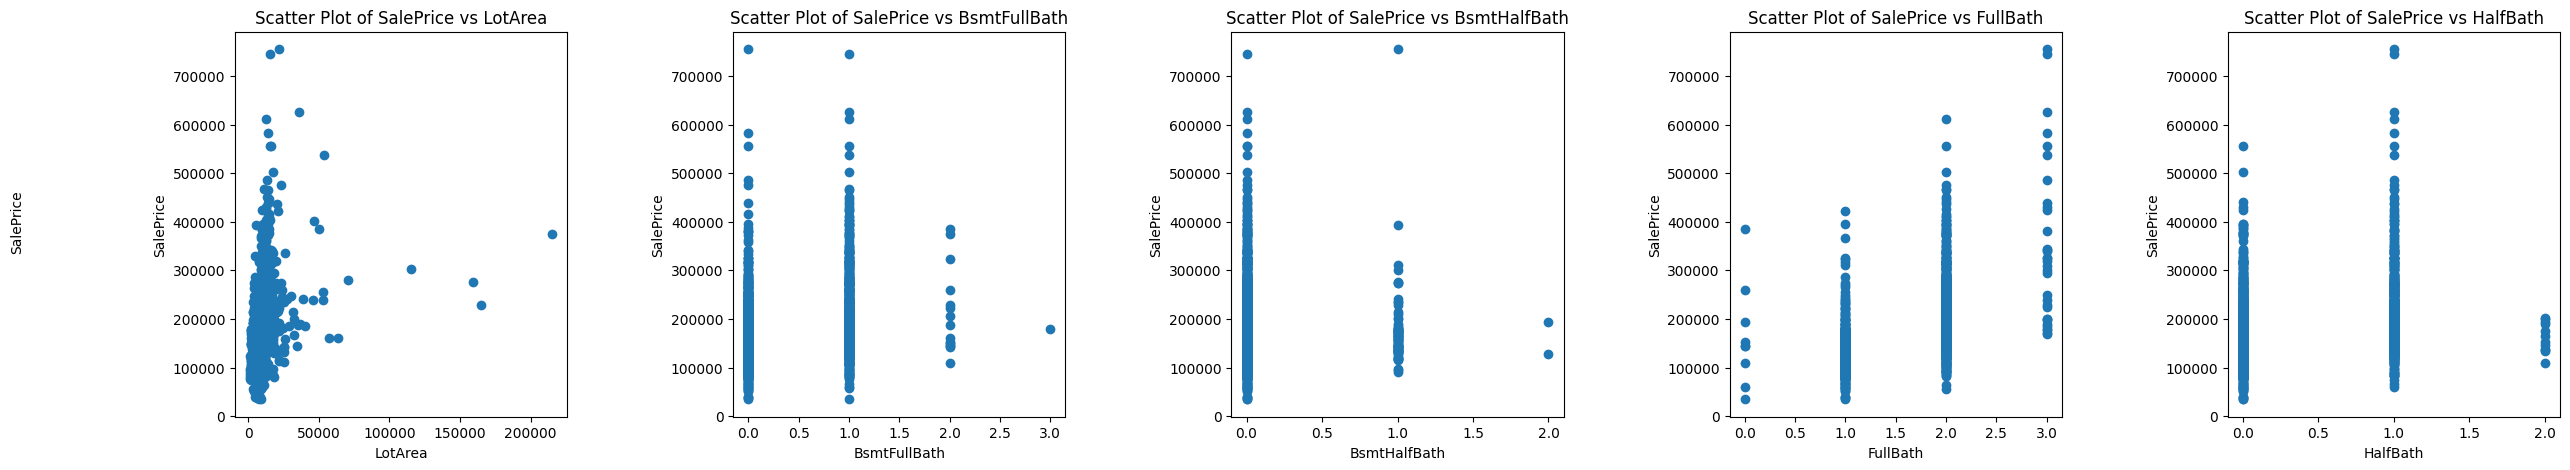

In [28]:
fig, ax = plt.subplots(1, len(train.columns) - 2, figsize=(30, 5))
fig.text(0.05, 0.5, 'SalePrice', va='center', rotation='vertical')

for i, col in enumerate(train.columns[:5]):
    if col not in ['SalePrice']:
        ax[i].scatter(train[col], train['SalePrice'])
        ax[i].set_xlabel(col)
        ax[i].set_ylabel('SalePrice')
        ax[i].set_title(f'Scatter Plot of SalePrice vs {col}')

plt.subplots_adjust(wspace=0.5)
plt.show()

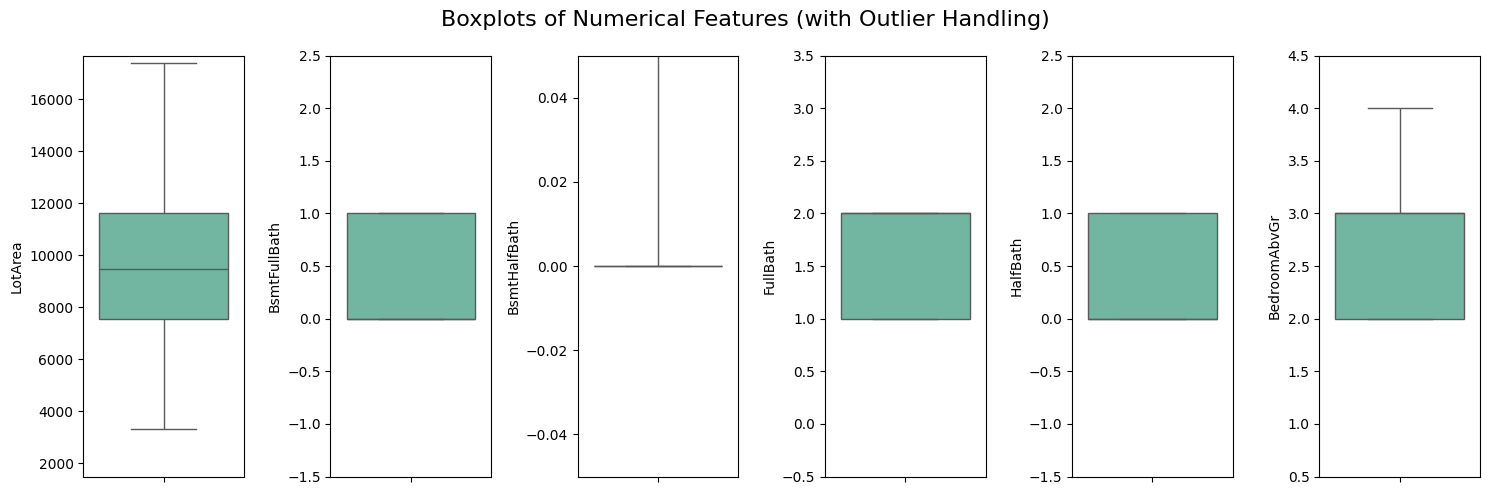

In [29]:
import warnings

# Function to calculate the whiskers based on a specified percentile range
def calc_whiskers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    return lower_whisker, upper_whisker

# Check if there are numerical columns in the DataFrame
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('SalePrice')  # Remove 'SalePrice' column if present

# Suppress warnings
warnings.filterwarnings("ignore")

# Loop through each numerical column and create a boxplot with customized whiskers
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)

    # Calculate whiskers based on 1.5*IQR
    lower_whisker, upper_whisker = calc_whiskers(train[col])

    # Create boxplot with customized whiskers
    sns.boxplot(y=train[col], palette="Set2", showfliers=False, whis=[5, 95])
    plt.ylabel(col)
    plt.ylim(lower_whisker, upper_whisker)  # Limit y-axis to the calculated whisker range

plt.suptitle('Boxplots of Numerical Features (with Outlier Handling)', fontsize=16)
plt.tight_layout()
plt.show()


Splitting the dataset

In [30]:
from numpy.random.mtrand import RandomState
x=train.drop(columns="SalePrice")
y=train["SalePrice"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## scaling  data

In [31]:
sc = StandardScaler()

In [32]:
train=sc.fit_transform(train)

learn the machine

In [33]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

slope and y intercept

In [34]:
c=lr.intercept_
print('y_intrecept:',c)
m=lr.coef_
print('slope:',m)

y_intrecept: 38146.05044817136
slope: [ 1.18178643e+00  3.51926937e+04  5.62017522e+03  7.71356989e+04
  3.51570817e+04 -6.81794994e+03]


prediction

In [35]:
y_predict=lr.predict(x_test)

visiualize the actual and prediction

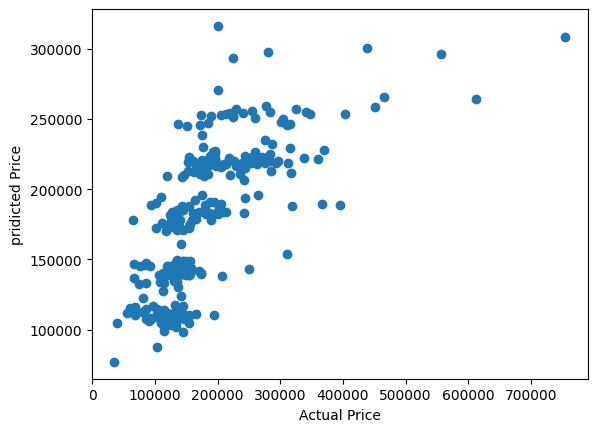

In [36]:
plt.scatter(y_test,y_predict)
plt.xlabel('Actual Price')
plt.ylabel('pridicted Price')
plt.show()

r square value

In [37]:
r2=r2_score(y_test,y_predict)
print('r square:',r2)

r square: 0.479233783160921


Importing Test data and sample_submission data

In [38]:
data_test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/prodigy/houseprice_prediction_Dataset/test.csv")
data_submission=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/prodigy/houseprice_prediction_Dataset/sample_submission.csv")


In [39]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [40]:
data_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [41]:
test=data_test.drop(columns=data_test.columns.difference(['LotArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr']))
print(test)

      LotArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr
0       11622           0.0           0.0         1         0             2
1       14267           0.0           0.0         1         1             3
2       13830           0.0           0.0         2         1             3
3        9978           0.0           0.0         2         1             3
4        5005           0.0           0.0         2         0             2
...       ...           ...           ...       ...       ...           ...
1454     1936           0.0           0.0         1         1             3
1455     1894           0.0           0.0         1         1             3
1456    20000           1.0           0.0         1         0             4
1457    10441           0.0           1.0         1         0             3
1458     9627           0.0           0.0         2         1             3

[1459 rows x 6 columns]


checking for missing values

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1459 non-null   int64  
 1   BsmtFullBath  1457 non-null   float64
 2   BsmtHalfBath  1457 non-null   float64
 3   FullBath      1459 non-null   int64  
 4   HalfBath      1459 non-null   int64  
 5   BedroomAbvGr  1459 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 68.5 KB


fill missing values with 0

In [43]:
filled_test=test.fillna(value=0)
print(filled_test)

      LotArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr
0       11622           0.0           0.0         1         0             2
1       14267           0.0           0.0         1         1             3
2       13830           0.0           0.0         2         1             3
3        9978           0.0           0.0         2         1             3
4        5005           0.0           0.0         2         0             2
...       ...           ...           ...       ...       ...           ...
1454     1936           0.0           0.0         1         1             3
1455     1894           0.0           0.0         1         1             3
1456    20000           1.0           0.0         1         0             4
1457    10441           0.0           1.0         1         0             3
1458     9627           0.0           0.0         2         1             3

[1459 rows x 6 columns]


predict the house price with test dataset

In [44]:
y_pre=lr.predict(filled_test)

Submission

In [45]:
submission=pd.DataFrame({"ID":range(1461,2920),"SalePrice":y_pre})
submission

,ID,SalePrice
0,1461,115380.571335
1,1462,146845.528162
2,1463,223464.786369
3,1464,218912.545038
4,1465,184696.389401
...,...,...
1454,2915,132272.919685
1455,2916,132223.284655
1456,2917,146838.371825
1457,2918,112787.106836
